In [38]:
import torch
import torch.nn as nn
from torch.optim import Adam
import matplotlib.pyplot as plt

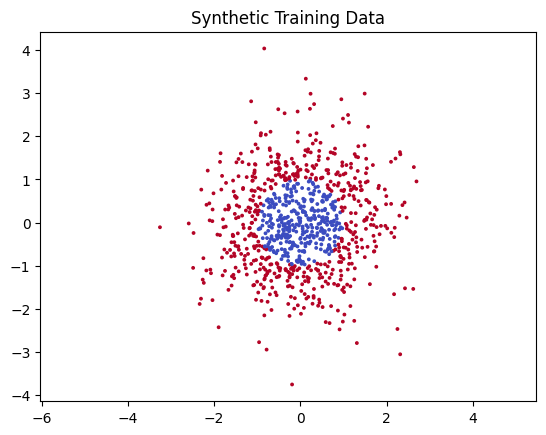

In [39]:
# Generate synthetic data
torch.manual_seed(10)
N = 1024
X = torch.randn(N, 2)
y = (X[:, 0]**2 + X[:, 1]**2 > 1.0).long() # Circular decision boundary
# Randomly Split data into training, and testing sets
train_indices = torch.randperm(N)[:900]
test_indices = torch.randperm(N)[900:]
train_X, test_X = X[train_indices], X[test_indices]
train_y, test_y = y[train_indices], y[test_indices]

# Plot the training data
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, s=3, cmap='coolwarm')
plt.title('Synthetic Training Data')
plt.axis('equal')
plt.show()

In [40]:
# Use DataLoader for Mini-Batching
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(train_X, train_y) # Create a dataset from training tensors
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) # DataLoader for mini-batch training

In [55]:
import torch
import torch.nn as nn

# Define a simple Multi-Layer Perceptron (MLP) model
class MLP(nn.Module):
    def __init__(self, in_features=2, hidden_units=10, out_features=1):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(in_features, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, out_features)
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
''' Alternative MLP definition with explicit layers
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, in_features=2, hidden_units=10, out_features=1):
        super(MLP, self).__init__()
        # Define Layers individually
        self.fc1 = nn.Linear(in_features, hidden_units)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_units, out_features)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
'''

In [64]:
# Instantiate the model, loss function, and optimizer
model = MLP(hidden_units=5) # Instantiate the MLP model
criterion = nn.BCEWithLogitsLoss() # Binary Cross Entropy with Logits Loss
optimizer = Adam(model.parameters(), lr=0.01) # Adam optimizer with learning rate 0.01

In [ ]:
# Main training loop using all the training data every epoch
num_epochs = 1000
for epoch in range(num_epochs):
    model.train() # Set model to training mode
    optimizer.zero_grad() # Clear gradients
    
    # Forward pass
    outputs = model(train_X).squeeze() # Calculate outputs
    loss = criterion(outputs, train_y.float()) # Compute loss

    # Backward pass and optimization
    loss.backward()  # Compute gradients
    optimizer.step() # Update weights
    
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on Testing set
with torch.no_grad():
    outputs = model(test_X).squeeze()
    predicted = (torch.sigmoid(outputs) > 0.5).long()
    accuracy = (predicted == test_y).float().mean()
    print(f'Accuracy on Testing set: {accuracy.item()*100:.2f}%')

# Evaluate the model on Training set
model.eval()
with torch.no_grad():
    outputs = model(train_X).squeeze()
    predicted = (torch.sigmoid(outputs) > 0.5).long()
    accuracy = (predicted == train_y).float().mean()
    print(f'Accuracy on Training set: {accuracy.item()*100:.2f}%')

Epoch [100/1000], Loss: 0.4472
Epoch [200/1000], Loss: 0.2341
Epoch [300/1000], Loss: 0.1395
Epoch [400/1000], Loss: 0.1051
Epoch [500/1000], Loss: 0.0863
Epoch [600/1000], Loss: 0.0744
Epoch [700/1000], Loss: 0.0662
Epoch [800/1000], Loss: 0.0602
Epoch [900/1000], Loss: 0.0557
Epoch [1000/1000], Loss: 0.0522
Accuracy on Testing set: 98.39%
Accuracy on Training set: 98.00%


In [ ]:
# Main Training Loop with Mini-batches every epoch
num_epochs = 100
for epoch in range(num_epochs): # Loop over epochs
    model.train() # Set model to training mode
    for batch_X, batch_y in train_loader: # Iterate over mini-batches
        optimizer.zero_grad() # Clear gradients
        outputs = model(batch_X).squeeze() # Forward pass
        loss = criterion(outputs, batch_y.float()) # Compute loss
        loss.backward() # Backward pass
        optimizer.step() # Update weights
    
    # Print loss every 100 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on Testing set
with torch.no_grad():
    outputs = model(test_X).squeeze() # Calculate outputs
    predicted = (torch.sigmoid(outputs) > 0.5).long() # Convert logits to binary predictions
    accuracy = (predicted == test_y).float().mean() # Calculate accuracy
    print(f'Accuracy on Testing set: {accuracy.item()*100:.2f}%')

# Evaluate the model on Training set
model.eval()
with torch.no_grad():
    outputs = model(train_X).squeeze()
    predicted = (torch.sigmoid(outputs) > 0.5).long()
    accuracy = (predicted == train_y).float().mean()
    print(f'Accuracy on Training set: {accuracy.item()*100:.2f}%')

Epoch [10/100], Loss: 0.1983
Epoch [20/100], Loss: 0.2452
Epoch [30/100], Loss: 0.0864
Epoch [40/100], Loss: 0.0408
Epoch [50/100], Loss: 0.0459
Epoch [60/100], Loss: 0.0749
Epoch [70/100], Loss: 0.0571
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0571
Epoch [100/100], Loss: 0.3294
Accuracy on Testing set: 100.00%
Accuracy on Training set: 99.33%


Grid shape for decision boundary: torch.Size([828234, 2])


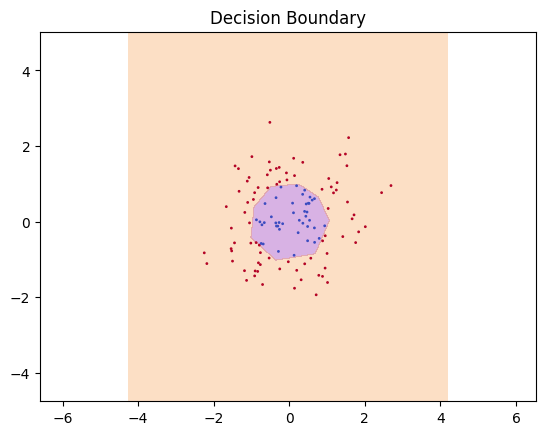

In [66]:
# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.01),
                        torch.arange(y_min, y_max, 0.01))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
print("Grid shape for decision boundary:", grid.shape)
with torch.no_grad():
    Z = model(grid).squeeze()
    Z = torch.sigmoid(Z).reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, cmap='plasma')
plt.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap='coolwarm', s=1)
plt.axis('equal')
plt.title('Decision Boundary')
plt.show()